# Tasks

1) <a href='#DECISION_TREE'>  Data Prep</a> <BR>
2) <a href='#CROSS_VALIDATION'>Simple xgboost Model Fit</a><br>
3)  <a href='#CROSS_VALIDATION'>Grid Search Fit</a><br>
4) <a href='#TWO_PARAMS'>Test Score</a>

<a id='CROSS_VALIDATION'>Data Prep</a>

In [1]:
import xgboost


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import graphviz

In [3]:
#df = pd.read_csv ('chapter_1_cleaned_data.csv')
import requests
url = 'https://raw.githubusercontent.com/steed360/PythonMachineLearning/main/chapter_1_cleaned_data.csv'
#s = requests.get(url).content
#c=pd.read_csv(io.StringIO(s.decode('utf-8')))
df = pd.read_csv ( url)


Get a list of the column names

In [4]:
features_response = df.columns.tolist ()
features_response

['Unnamed: 0',
 'ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_2',
 'grad school',
 'high school',
 'other',
 'uni']

In [5]:
lst_items_to_remove = [features_response[0]] +['ID', 'SEX','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','EDUCATION_2', 'grad school', 'high school', 'other', 'uni']
lst_items_to_remove

['Unnamed: 0',
 'ID',
 'SEX',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'EDUCATION_2',
 'grad school',
 'high school',
 'other',
 'uni']

In [6]:
features_response = [item for item in features_response if item not in lst_items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [8]:
X_train, X_test, y_train, y_test = train_test_split ( df[features_response[:-1]]  , df['default payment next month'] , test_size = 0.2, random_state = 24)

In [9]:
print (X_train.shape, y_train.shape)

(21331, 17) (21331,)


<a id='CROSS_VALIDATION'>Simple xgboost fit</a>

In [10]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

seed = 7
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
predict_proba =  model.predict_proba (X_test ) 
#fpr, tpr, thresholds =  roc_curve (y_cv_test, predict_proba[:,1])

roc_score = roc_auc_score (y_test, predict_proba[:,1])    

Text(0, 0.5, 'TPR')

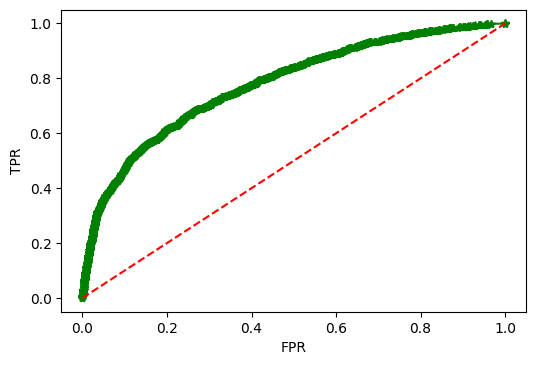

In [11]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_obj = roc_curve (y_test, predict_proba[:,1])

plt.plot (fpr, tpr, 'g*-')
plt.plot ( [0,1], [0,1], 'r--')

plt.xlabel ('FPR')
plt.ylabel ('TPR')

In [12]:
print (roc_score)

0.7782671134514122


<a id='CROSS_VALIDATION'>xgboost Cross Validation</a>

#### Apply a random forest

In [13]:
#params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
# "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
# "min_child_weight" : [ 1, 3, 5, 7 ],
# "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
# "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }


params ={"learning_rate"    : [0.05, 0.3 ] ,
 "max_depth"        : [ 3, 8, 15],
 "min_child_weight" : [ 1, 3, 7 ],
 "gamma"            : [ 0.0, 0.2, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.7 ] }

params

{'colsample_bytree': [0.3, 0.7],
 'gamma': [0.0, 0.2, 0.4],
 'learning_rate': [0.05, 0.3],
 'max_depth': [3, 8, 15],
 'min_child_weight': [1, 3, 7]}

In [14]:
mod2 = XGBClassifier()

In [15]:
from sklearn.model_selection import GridSearchCV
cv_rf_ex = GridSearchCV ( mod2, param_grid = params, scoring= 'roc_auc')
cv_rf_ex.cv = 5
cv_rf_ex.fit ( X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'gamma': [0.0, 0.2, 0.4], 'learning_rate': [0.05, 0.3],
                         'max_depth': [

In [16]:
import pandas as pd
cv_rf_ex_results_df = pd.DataFrame ( cv_rf_ex.cv_results_)

In [17]:
cv_rf_ex_results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.880820,0.009030,0.018215,0.000524,0.3,0,0.05,3,1,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.764152,0.769204,0.770993,0.790138,0.773327,0.773563,0.008820,24
1,0.865142,0.007748,0.018236,0.000897,0.3,0,0.05,3,3,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.763731,0.769447,0.771055,0.789526,0.773231,0.773398,0.008657,26
2,0.862161,0.004947,0.017893,0.000121,0.3,0,0.05,3,7,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.763886,0.769384,0.771071,0.790167,0.773706,0.773643,0.008866,20
3,2.055457,0.014734,0.043202,0.000341,0.3,0,0.05,8,1,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.770272,0.775137,0.770995,0.788582,0.772290,0.775455,0.006770,16
4,2.043221,0.008880,0.043228,0.000362,0.3,0,0.05,8,3,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.773106,0.775318,0.772227,0.787008,0.772701,0.776072,0.005570,14
5,2.023436,0.015179,0.043571,0.000786,0.3,0,0.05,8,7,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.774776,0.776377,0.772031,0.787607,0.774604,0.777079,0.005445,9
6,3.978791,0.023287,0.094765,0.001128,0.3,0,0.05,15,1,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.761278,0.764230,0.758046,0.776610,0.761679,0.764369,0.006428,71
7,3.839819,0.012972,0.079594,0.000468,0.3,0,0.05,15,3,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.766231,0.767966,0.759841,0.775040,0.762756,0.766367,0.005166,67
8,3.647403,0.016968,0.069323,0.000864,0.3,0,0.05,15,7,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.770875,0.774058,0.765172,0.775292,0.766064,0.770292,0.004089,60
9,0.838695,0.003720,0.018216,0.000340,0.3,0,0.3,3,1,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.766338,0.772110,0.767874,0.779511,0.770395,0.771246,0.004588,49


In [18]:
cv_rf_ex.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 3}

In [19]:
df_feature_importance = pd.DataFrame (  { 'Feature name': features_response[:-1],
                                         'Importance'   : cv_rf_ex.best_estimator_.feature_importances_
                                        })

df_feature_importance.sort_values ('Importance', ascending= False)[0:10]

,Feature name,Importance
4,PAY_1,0.658891
0,LIMIT_BAL,0.034337
12,PAY_AMT2,0.026378
11,PAY_AMT1,0.024705
13,PAY_AMT3,0.024143
8,BILL_AMT4,0.021760
5,BILL_AMT1,0.021739
6,BILL_AMT2,0.021144
7,BILL_AMT3,0.021018
14,PAY_AMT4,0.020745


<a id='CROSS_VALIDATION'>Get the Test Score</a>

In [20]:
mod3 = XGBClassifier()

mod3.colsample_bytree     = 0.7
mod3.gamma                = 0.4
mod3.learning_rate        = 0.05
mod3.max_depth            = 8
mod3.min_child_weight     = 3

In [21]:
mod3.fit ( X_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
predict_proba =  mod3.predict_proba ( X_test ) 
#fpr, tpr, thresholds =  roc_curve (y_cv_test, predict_proba[:,1])
roc_score = roc_auc_score (y_test, predict_proba[:,1])    
print (roc_score)

0.9603920971321641


Text(0, 0.5, 'TPR')

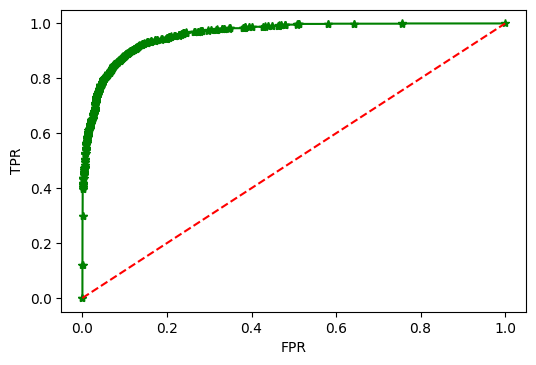

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_obj = roc_curve (y_test, predict_proba[:,1])
plt.plot (fpr, tpr, 'g*-')
plt.plot ( [0,1], [0,1], 'r--')
plt.xlabel ('FPR')
plt.ylabel ('TPR')